In [117]:
%matplotlib inline
from __future__ import division, print_function

import sys
sys.path.append("../")

import matplotlib as mpl
import matplotlib.pyplot as plt
import gc_colors
import TBFunctions as TB
import danplotlib as dpl
import numpy as np
from scipy import stats
import pandas as pd
from itertools import izip

plt.style.use("presentation")
gc_colors.update_colorcycle()

# READ DATA

In [3]:
algos = ["Default"]
Layer = 0
Ths = 152535

DF = TB.HDF2DF("/auto/data/berninghoff/tb2017_2_Output/SPIROC/Layer_{}/Clustering/tb2017_2_SPIROC_5GeV_000mm_0degree_3V5_1_ThS{}.h5"
               .format(Layer, Ths), clusteralgos=algos)
print("Read {} events.".format(len(DF)))

Reading in data from /auto/data/berninghoff/tb2017_2_Output/SPIROC/Layer_0/Clustering/tb2017_2_SPIROC_5GeV_000mm_0degree_3V5_1_ThS152535.h5
Cluster algorithms ['Default']
Read 500000 events.


# Plot pixels without any cut

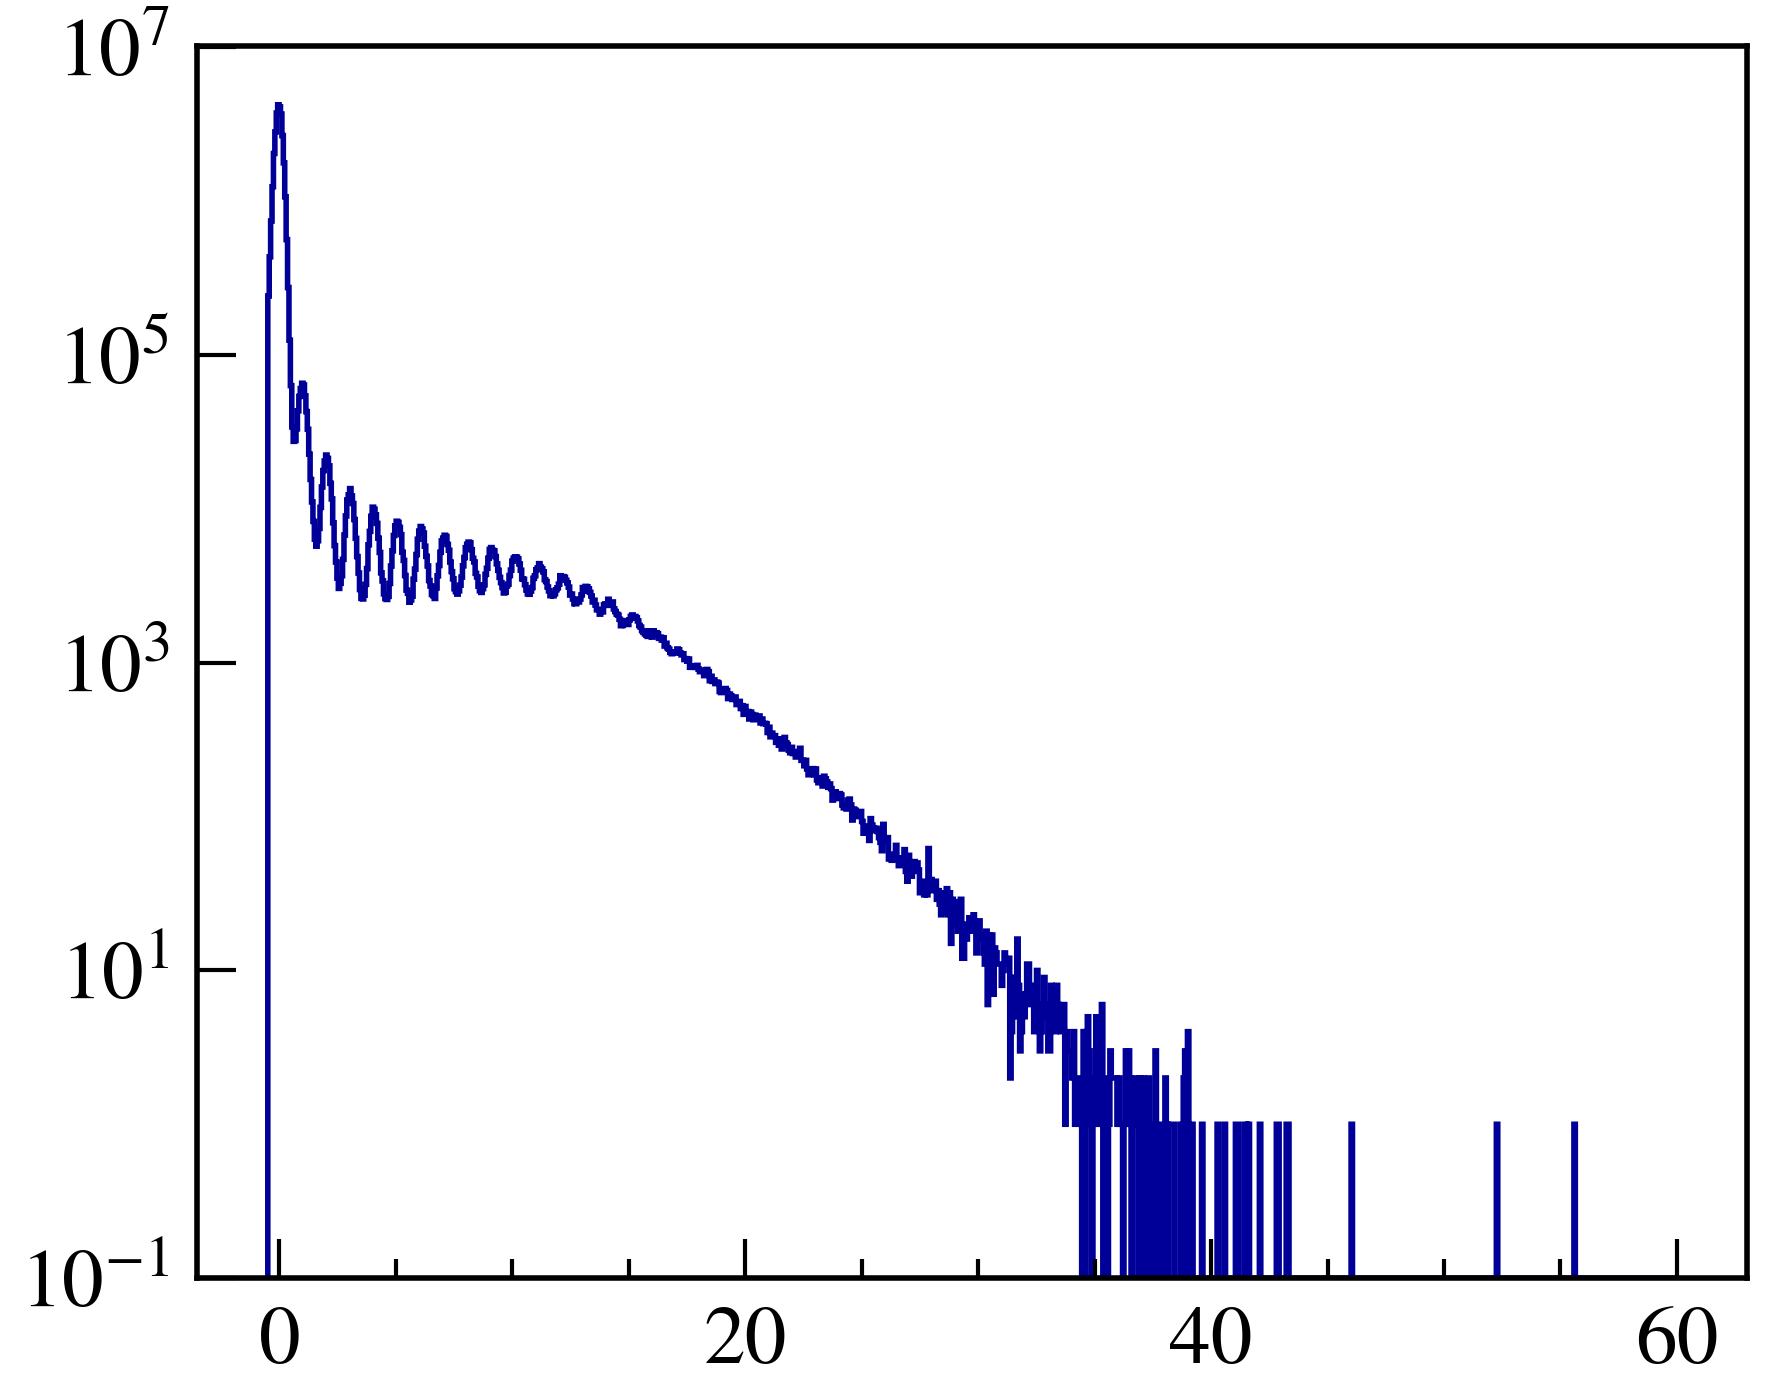

In [11]:
pixel_data = DF[["Ch_Pixels_{}".format(ch) for ch in range(320, 384)]]

dpl.hist(pixel_data.values.flatten(), bins=np.linspace(-0.5, 60, 1000), log=True)
plt.show()
plt.close()

# Plot pixels of channels in cluster

In [94]:
n_chs = 64
n_start = 320

pixel_data = DF[["Ch_Pixels_{}".format(ch) for ch in range(n_start, n_start+n_chs)]]
pixel_hist_in_cluster = []
pixel_hist_cluster_mid = []
pixel_hist_at_track = []
pixel_hist_singlech = []
for pixels, clusters, trackhit in izip(pixel_data.values, DF["Clusters_Default"], 
                                       np.rint(DF["TrackHit_Ch"]).astype(int)):
    for cluster in clusters:
        #Single channel cluster
        if cluster.Size() == 1:
            pixel_hist_singlech.append(pixels[cluster.Channels[0]-n_start])
        #All channels in cluster
        for ch in cluster.Channels:
            pixel_hist_in_cluster.append(pixels[ch-n_start])
        #Cluster mid
        mid = np.rint(cluster.Position()).astype(int)
        pixel_hist_cluster_mid.append(pixels[mid-n_start])
    
    #Track positions
    if trackhit >= n_start and trackhit < n_start+n_chs:
        pixel_hist_at_track.append(pixels[trackhit-n_start])


=====No cut=====
Mean lightyield: 0.3 pes
>  5 pes: ( 2.29 +/-  0.00)%
> 10 pes: ( 1.13 +/-  0.00)%
> 15 pes: ( 0.36 +/-  0.00)%
> 20 pes: ( 0.08 +/-  0.00)%
> 25 pes: ( 0.01 +/-  0.00)%
> 30 pes: ( 0.00 +/-  0.00)%

=====Channel in cluster=====
Mean lightyield: 7.9 pes
>  5 pes: (64.02 +/-  0.04)%
> 10 pes: (31.64 +/-  0.04)%
> 15 pes: (10.20 +/-  0.03)%
> 20 pes: ( 2.19 +/-  0.01)%
> 25 pes: ( 0.39 +/-  0.01)%
> 30 pes: ( 0.06 +/-  0.00)%

=====Cluster mid=====
Mean lightyield: 10.5 pes
>  5 pes: (89.34 +/-  0.04)%
> 10 pes: (49.65 +/-  0.07)%
> 15 pes: (16.63 +/-  0.05)%
> 20 pes: ( 3.62 +/-  0.03)%
> 25 pes: ( 0.64 +/-  0.01)%
> 30 pes: ( 0.10 +/-  0.00)%

=====Track mid=====
Mean lightyield: 9.7 pes
>  5 pes: (79.67 +/-  0.06)%
> 10 pes: (46.49 +/-  0.07)%
> 15 pes: (15.87 +/-  0.05)%
> 20 pes: ( 3.40 +/-  0.03)%
> 25 pes: ( 0.57 +/-  0.01)%
> 30 pes: ( 0.08 +/-  0.00)%

=====Single channel cluster=====
Mean lightyield: 10.2 pes
>  5 pes: (93.76 +/-  0.10)%
> 10 pes: (49.55 +/-  

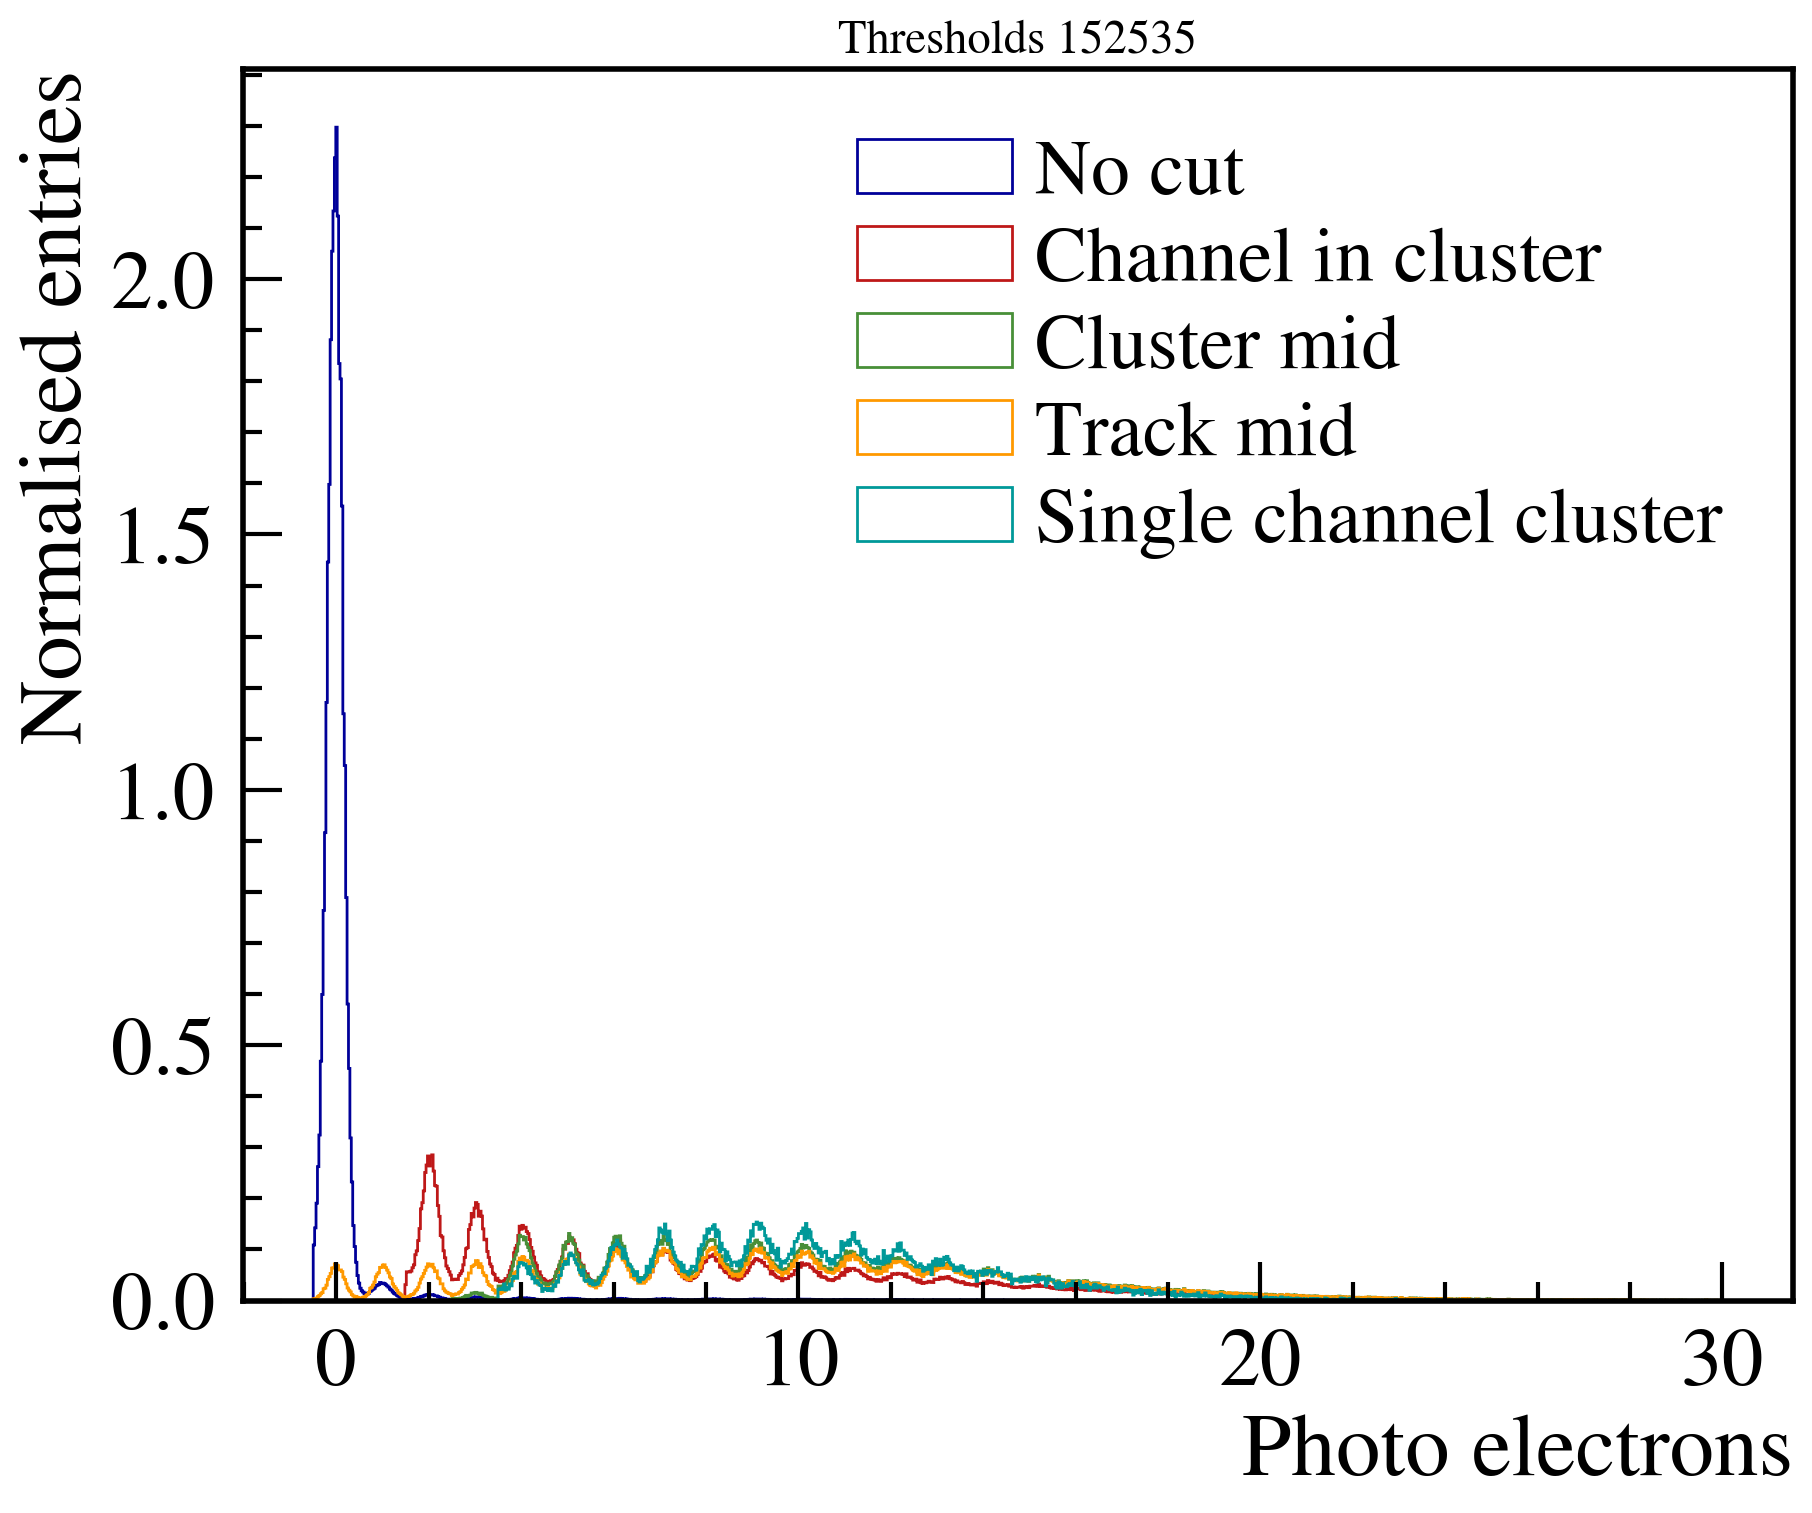

In [121]:
for hist, descr in izip( [pixel_hist_in_cluster, pixel_hist_cluster_mid, pixel_hist_at_track, pixel_hist_singlech],
                         ["Channel in cluster", "Cluster mid", "Track mid", "Single channel cluster"] ):
    hist_arr = np.asarray(hist)
    print("\n====="+descr+"=====")
    print("Mean lightyield: {:.1f} pes".format(np.mean(hist_arr), stats.sem(hist_arr)))
    for pe in range(5,31,5):
        eff = TB.calc_TEfficiency(len(hist_arr[hist_arr>pe]), len(hist_arr))
        print(">{:3} pes: ({:5.2f} +/- {:5.2f})%".format(pe, eff[0]*100, np.mean(eff[1:])*100))

    dpl.hist(hist, bins=np.linspace(-0.5, 30, 1000), log=False, label=descr, linewidth=1, normed=True)

plt.title("Thresholds {}".format(Ths))
dpl.xlabel("Photo electrons")
dpl.ylabel("Normalised entries")
plt.legend()
plt.show()
plt.close()

In [113]:
arr = np.ones(3)
stats.sem(arr)

0.0